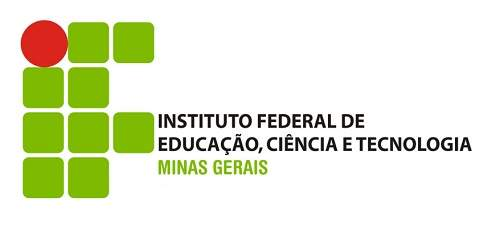

**Engenharia de Controle e Automação - Processamento de Sinais** - Prof. Leandro Freitas

#  João Vitor Prata Moreira Salgado - 0038210

#  Fernando Andrade da Silva - 0037130

##  Trabalho Prático 05 

### Projeto de Filtros IIR

## Introdução

Aplicar um método em busca de uma resposta em frequência desejada, por uma função de transferência, cosiste numa razão de polinômios. De certa forma, na maioria das vezes, essa função de transferência resulta em uma resposta ao impulso com duração infinita, tal qual são nomeados de filtros com resposta ao impsulso de duração infinita (IIR).
Esses filtros são capazes de aproximar uma resposta na frequência prescrita com um número de multiplicações menor que os filtros FIR, por esse motivo, os filtros IIR podem ser mais adequados a algumas aplicações práticas, especialmente aquelas envolvendo processamento de sinais em tempo real. Para isso, existem métodos clássicos para aproximações de filtros analógicos como de Butterworth, Chebyshev e elíptica, que são mais utilizados para aproximações de módulo prescritas.

## Objetivo

Projeto e implementação de filtros IIR, em diferenter aproximações.

# PROJETO DE FILTROS FIR

Para isso, considere o sinal: x(t) = 1,5 sin(2πa1t) − 3 sin(2πa2t) + 2 sin(2π(a1 + a2)t), em que a1 e a2 são
respectivamente o último número do registro acadêmico (RA) de cada integrante da dupla, sendo que a1 < a2 e que
a1 ≠ a2, sendo estes não nulos. Portanto, se os últimos números forem iguais ou um deles for zero, escolha o
penúltimo dígito de um dos alunos.

In [21]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import IPython.display as ipd
from scipy.io import wavfile
from scipy import signal

In [4]:
a1=1
a2=3

In [5]:
fs = 5*(a1+a2)

In [6]:
t = np.arange(0,1000,1/fs)

In [7]:
x = 5*np.sin(200*np.pi*a1*t) - 3*np.sin(200*np.pi*a2*t) + 4*np.sin(200*np.pi*(a1+a2)*t)

## Filtro Butterworth

a) Passa-baixas (ya): em que apenas a frequência correspondente à a1 apareça na saída do filtro;

In [8]:
Ap = 0.5    #dB
Ar = 65     #dB

In [52]:
wp = (180*np.pi*a1)/(200*np.pi*a1)   #rad
ws = (200*np.pi*a1)/(200*np.pi*a1)   #rad

gpass = Ap   #dB
gstop = Ar   #dB

print("wp =", wp)
print("ws =", ws)

wp = 0.9
ws = 1.0


In [53]:
N, Wn = sp.signal.buttord(wp, ws, gpass, gstop, analog=True) #Filtro Butterworth - Retorna a ordem e a frequência de corte

In [54]:
print(N, Wn)

82 0.9116184067081702


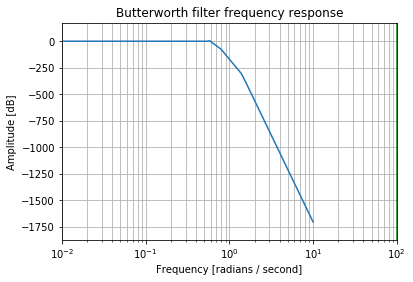

In [55]:
b,a = sp.signal.butter(N, Wn, btype='lowpass', analog=True, output='ba')     #b=numerador
                                                                             #a=denominador
w,h = signal.freqs(b, a)

plt.plot(w, 20 * np.log10(abs(h)))
plt.xscale('log')
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()


In [56]:
wo = 200*np.pi*a1

In [57]:
q,t = sp.signal.lp2lp(b, a, wo)

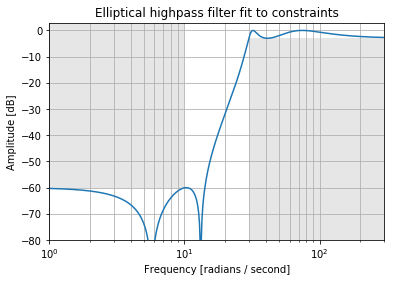

In [58]:
N, Wn = signal.ellipord(30, 10, 3, 60, True)
b, a = signal.ellip(N, 3, 60, Wn, 'high', True)
w, h = signal.freqs(b, a, np.logspace(0, 3, 500))
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Elliptical highpass filter fit to constraints')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.grid(which='both', axis='both')
plt.fill([.1, 10,  10,  .1], [1e4, 1e4, -60, -60], '0.9', lw=0) # stop
plt.fill([30, 30, 1e9, 1e9], [-99,  -3,  -3, -99], '0.9', lw=0) # pass
plt.axis([1, 300, -80, 3])
plt.show()